In [50]:
#Importing Libraries
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import ast
import seaborn as sns

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [55]:
df_DA = df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')].copy()

df_DA['job_posted_month'] = df_DA['job_posted_date'].dt.month

df_DA_exploded = df_DA.explode('job_skills')

df_pivot = df_DA_exploded.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)
df_pivot.loc['Total'] = df_pivot.sum()
df_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,39,7,206,21,7,1,0,15,17,0,...,7,9,80,3,968,0,7,0,0,30
2,35,0,203,23,4,1,0,14,9,0,...,6,6,92,3,738,3,0,0,0,19
3,39,1,219,5,5,6,1,14,11,0,...,7,6,76,5,736,1,1,1,0,16
4,28,1,208,8,3,7,3,5,6,0,...,2,4,86,9,695,8,1,0,0,12
5,27,3,144,15,8,9,1,5,13,0,...,1,6,67,1,557,3,0,0,0,9
6,39,5,188,9,4,8,3,7,7,0,...,5,2,69,8,721,5,0,0,0,20
7,42,2,160,5,3,5,5,6,2,0,...,4,1,59,10,587,0,0,0,1,13
8,44,2,187,5,3,10,0,5,3,0,...,3,6,87,4,752,0,0,0,0,26
9,22,3,145,11,2,3,4,4,3,0,...,0,4,80,4,478,0,0,0,1,12


In [81]:
df_pivot = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).index]

df_table = df_pivot.iloc[:, :5].drop('Total')
df_table


job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
1,4601,3592,2488,2254,1832
2,3168,2587,1676,1618,1212
3,3226,2661,1804,1683,1238
4,3220,2549,1789,1679,1302
5,2581,2118,1432,1349,972
6,2862,2382,1628,1609,984
7,2609,2118,1533,1438,996
8,3414,2731,1951,2025,1276
9,2295,1801,1353,1229,856


In [87]:
skill_total = df_DA.groupby('job_posted_month').size()
df_plot = df_table.iloc[:12].div(skill_total/100, axis=0)

df_plot = df_plot.reset_index()
df_plot['job_posted_month'] = df_plot['job_posted_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

df_plot = df_plot.set_index('job_posted_month')
df_plot


job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166
Feb,51.730895,42.243632,27.367734,26.420640,19.790986
Mar,51.881634,42.795111,29.012544,27.066581,19.909939
Apr,53.231939,42.139197,29.575136,27.756654,21.524219
May,51.692369,42.419387,28.680152,27.017825,19.467254
Jun,50.360725,41.914482,28.646841,28.312511,17.314799
Jul,50.163430,40.722938,29.475101,27.648529,19.150163
Aug,51.462165,41.166717,29.409105,30.524570,19.234248
Sep,49.471869,38.823022,29.165768,26.492779,18.452253


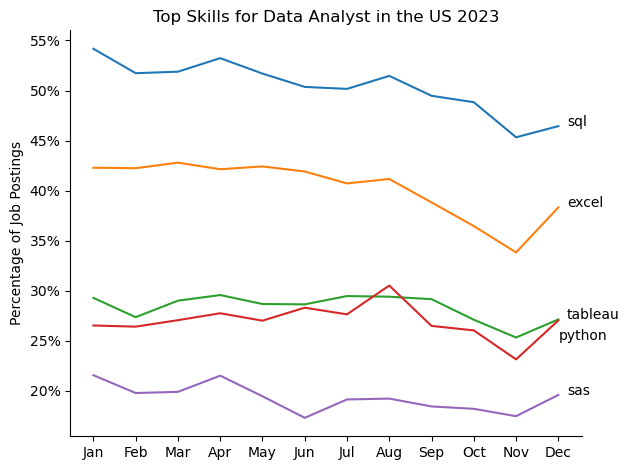

In [105]:
sns.lineplot(data=df_plot, dashes=False, legend='full', palette='tab10')
plt.xlabel('')
plt.ylabel('Percentage of Job Postings')
plt.legend().set_visible(False)
sns.despine()

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.0f}%'))

for i in range(5):
    if i == 3:
        plt.text(11, df_plot.iloc[-1, i]-2, df_plot.columns[i], color='black')
    else:
        plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i], color='black')

plt.title('Top Skills for Data Analyst in the US 2023')
plt.tight_layout()
plt.show()
